In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

In [3]:
car_data = pd.read_csv('./dataset/Carsale_data.csv')
car_data.head()

,Car_ID,Brand,Model,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price
0,1,Toyota,Corolla,2018,50000,Petrol,Manual,First,15,1498,108,5,800000
1,2,Honda,Civic,2019,40000,Petrol,Automatic,Second,17,1597,140,5,1000000
2,3,Ford,Mustang,2017,20000,Petrol,Automatic,First,10,4951,395,4,2500000
3,4,Maruti,Swift,2020,30000,Diesel,Manual,Third,23,1248,74,5,600000
4,5,Hyundai,Sonata,2016,60000,Diesel,Automatic,Second,18,1999,194,5,850000


In [4]:
car_data.drop(columns=['Car_ID'], inplace=True)
car_data.head()

,Brand,Model,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price
0,Toyota,Corolla,2018,50000,Petrol,Manual,First,15,1498,108,5,800000
1,Honda,Civic,2019,40000,Petrol,Automatic,Second,17,1597,140,5,1000000
2,Ford,Mustang,2017,20000,Petrol,Automatic,First,10,4951,395,4,2500000
3,Maruti,Swift,2020,30000,Diesel,Manual,Third,23,1248,74,5,600000
4,Hyundai,Sonata,2016,60000,Diesel,Automatic,Second,18,1999,194,5,850000


In [5]:
car_data.shape

(100, 12)

In [6]:
car_data.isnull().sum()

Brand                0
Model                0
Year                 0
Kilometers_Driven    0
Fuel_Type            0
Transmission         0
Owner_Type           0
Mileage              0
Engine               0
Power                0
Seats                0
Price                0
dtype: int64

In [7]:
car_data.duplicated().sum()

np.int64(39)

In [8]:
car_data.shape

(100, 12)

In [9]:
car_data

,Brand,Model,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price
0,Toyota,Corolla,2018,50000,Petrol,Manual,First,15,1498,108,5,800000
1,Honda,Civic,2019,40000,Petrol,Automatic,Second,17,1597,140,5,1000000
2,Ford,Mustang,2017,20000,Petrol,Automatic,First,10,4951,395,4,2500000
3,Maruti,Swift,2020,30000,Diesel,Manual,Third,23,1248,74,5,600000
4,Hyundai,Sonata,2016,60000,Diesel,Automatic,Second,18,1999,194,5,850000
...,...,...,...,...,...,...,...,...,...,...,...,...
95,Mercedes,C-Class,2019,22000,Diesel,Automatic,First,16,1950,191,5,2900000
96,Toyota,Innova Crysta,2017,38000,Diesel,Manual,Second,13,2755,171,7,1400000
97,Ford,EcoSport,2018,26000,Petrol,Manual,Third,18,1497,121,5,750000
98,Hyundai,Verna,2019,24000,Petrol,Automatic,Second,17,1497,113,5,850000


In [10]:
car_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Brand              100 non-null    object
 1   Model              100 non-null    object
 2   Year               100 non-null    int64 
 3   Kilometers_Driven  100 non-null    int64 
 4   Fuel_Type          100 non-null    object
 5   Transmission       100 non-null    object
 6   Owner_Type         100 non-null    object
 7   Mileage            100 non-null    int64 
 8   Engine             100 non-null    int64 
 9   Power              100 non-null    int64 
 10  Seats              100 non-null    int64 
 11  Price              100 non-null    int64 
dtypes: int64(7), object(5)
memory usage: 9.5+ KB


In [11]:
for col in car_data.columns:
    print(col)
    print(car_data[col].unique())

Brand
['Toyota' 'Honda' 'Ford' 'Maruti' 'Hyundai' 'Tata' 'Mahindra' 'Volkswagen'
 'Audi' 'BMW' 'Mercedes']
Model
['Corolla' 'Civic' 'Mustang' 'Swift' 'Sonata' 'Nexon' 'Scorpio' 'Polo'
 'A4' 'X1' 'C-Class' 'Endeavour' 'Creta' 'Harrier' 'Ertiga' 'City'
 'Tiguan' 'Q3' '5 Series' 'GLC' 'Innova' 'Figo' 'Verna' 'Altroz' 'Thar'
 'Passat' 'A6' 'X3' 'E-Class' 'Fortuner' 'Aspire' 'Elantra' 'Safari'
 'Vitara' 'WR-V' 'Ameo' 'A3' '7 Series' 'GLE' 'Yaris' 'Ranger' 'Santro'
 'Tigor' 'S-Cross' 'BR-V' 'T-Roc' 'Q7' 'X5' 'GLA' 'Camry' 'Venue' 'Tiago'
 'XUV300' 'Vento' 'A5' '3 Series' 'Innova Crysta' 'EcoSport']
Year
[2018 2019 2017 2020 2016 2021]
Kilometers_Driven
[50000 40000 20000 30000 60000 35000 45000 25000 28000 22000 18000 42000
 32000 38000 24000 26000 15000 10000]
Fuel_Type
['Petrol' 'Diesel']
Transmission
['Manual' 'Automatic']
Owner_Type
['First' 'Second' 'Third']
Mileage
[15 17 10 23 18 20 16 12 19 25 13 24 22 14 21]
Engine
[1498 1597 4951 1248 1999 1198 2179  999 1968 1995 1991 2198 1497 19

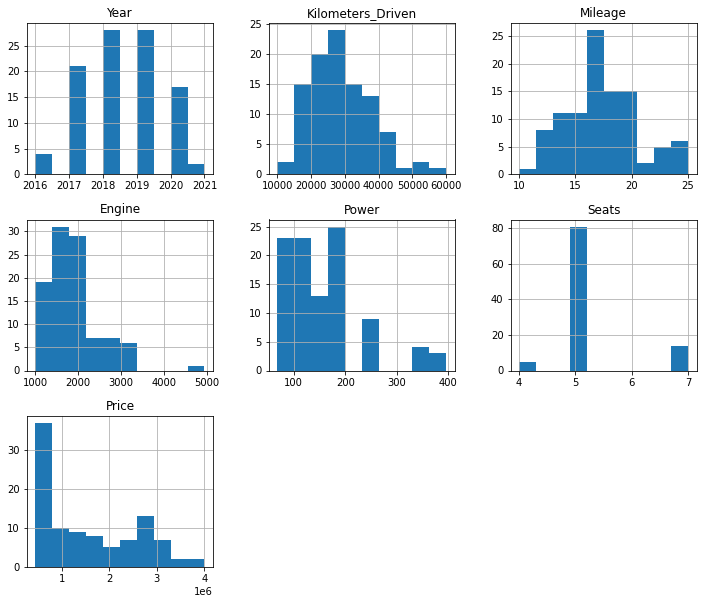

In [12]:
car_data.hist(figsize=(12, 10))
plt.show()

In [13]:
label_encoders = {}
for column in ['Brand', 'Model', 'Fuel_Type', 'Transmission', 'Owner_Type']:
    label_encoders[column] = LabelEncoder()
    car_data[column] = label_encoders[column].fit_transform(car_data[column])
car_data

,Brand,Model,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price
0,9,15,2018,50000,1,1,0,15,1498,108,5,800000
1,3,14,2019,40000,1,0,1,17,1597,140,5,1000000
2,2,30,2017,20000,1,0,0,10,4951,395,4,2500000
3,6,42,2020,30000,0,1,2,23,1248,74,5,600000
4,4,41,2016,60000,0,0,1,18,1999,194,5,850000
...,...,...,...,...,...,...,...,...,...,...,...,...
95,7,11,2019,22000,0,0,0,16,1950,191,5,2900000
96,9,29,2017,38000,0,1,1,13,2755,171,7,1400000
97,2,18,2018,26000,1,1,2,18,1497,121,5,750000
98,4,50,2019,24000,1,0,1,17,1497,113,5,850000


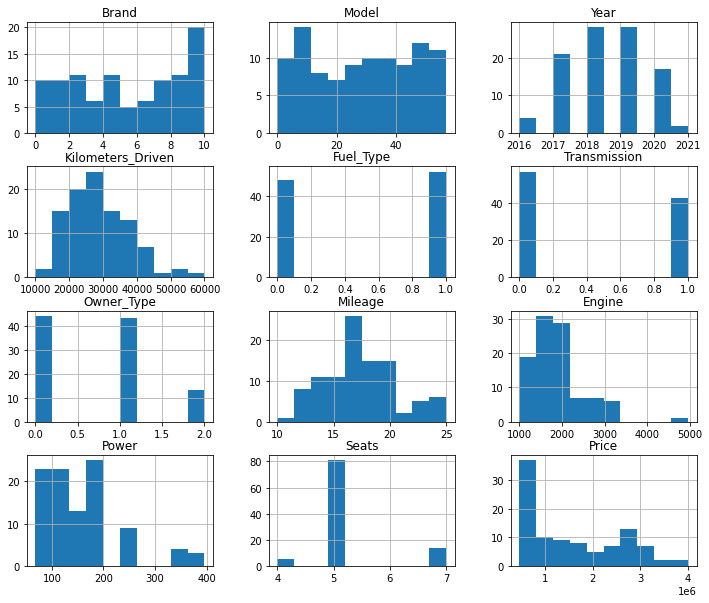

In [14]:
car_data.hist(figsize=(12, 10))
plt.show()

In [15]:
for col in car_data.columns:
    print(col)
    print(car_data[col].unique())

Brand
[ 9  3  2  6  4  8  5 10  0  1  7]
Model
[15 14 30 42 41 31 40 33  4 53 11 20 16 27 21 13 47 34  1 25 28 22 50  7
 44 32  6 54 17 23  9 19 38 51 52  8  3  2 26 57 36 39 46 37 10 43 35 55
 24 12 49 45 56 48  5  0 29 18]
Year
[2018 2019 2017 2020 2016 2021]
Kilometers_Driven
[50000 40000 20000 30000 60000 35000 45000 25000 28000 22000 18000 42000
 32000 38000 24000 26000 15000 10000]
Fuel_Type
[1 0]
Transmission
[1 0]
Owner_Type
[0 1 2]
Mileage
[15 17 10 23 18 20 16 12 19 25 13 24 22 14 21]
Engine
[1498 1597 4951 1248 1999 1198 2179  999 1968 1995 1991 2198 1497 1956
 1462 1395 2755 1194 1582 1199 2184 1984 1950 1197 2993 2996 1496 1086
 1047 2967 2998 2143 2487 2261 1598 1998]
Power
[108 140 395  74 194  76 187 190 181 158 113 167 103  98 141 148 241 171
  94 126  85 130 174 191 150 261 362 106  68  69 245 335 170 176 396  81
  84 115 258 121]
Seats
[5 4 7]
Price
[ 800000 1000000 2500000  600000  850000  750000  900000  650000 2200000
 2700000 2300000 2000000 1600000 1800000 19000

In [16]:
car_data

,Brand,Model,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price
0,9,15,2018,50000,1,1,0,15,1498,108,5,800000
1,3,14,2019,40000,1,0,1,17,1597,140,5,1000000
2,2,30,2017,20000,1,0,0,10,4951,395,4,2500000
3,6,42,2020,30000,0,1,2,23,1248,74,5,600000
4,4,41,2016,60000,0,0,1,18,1999,194,5,850000
...,...,...,...,...,...,...,...,...,...,...,...,...
95,7,11,2019,22000,0,0,0,16,1950,191,5,2900000
96,9,29,2017,38000,0,1,1,13,2755,171,7,1400000
97,2,18,2018,26000,1,1,2,18,1497,121,5,750000
98,4,50,2019,24000,1,0,1,17,1497,113,5,850000


In [17]:
x = car_data.drop(columns=['Price'])
y = car_data['Price']

In [18]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)
model = LinearRegression()
model.fit(x_train, y_train)

LinearRegression()

In [19]:
y_pred = model.predict(x_test)
r2 = r2_score(y_test, y_pred)
print(f'R^2 Score: {r2}')

R^2 Score: 0.8884761101866248


In [21]:
import pickle

with open('car_price_model.pkl', 'wb') as f:
    pickle.dump((model, label_encoders), f)